Proyecto Mecánica de Fluidos Grupo 13

In [7]:
import scipy.io as sio
import numpy as np
data = sio.loadmat('data.mat')
x = data['x']
y = data['y']
u = data['u']
v = data['v']
# Arrays de los datos
x_array = np.array(data['x'])
y_array = np.array(data['y'])
u_array = np.array(data['u'])
v_array = np.array(data['v'])

Ver las dimensiones de cada matriz para ver si se importaron bien los datos

In [9]:
print(x_array.shape)
print(y_array.shape)
print(u_array.shape)
print(v_array.shape)

(116, 15)
(116, 15)
(116, 15, 39999)
(116, 15, 39999)


Diccionario con parámetros del agua en las condiciones del experimento (Fuente: Frank M. White Fluid Mechanics 7th Edition page 27 Table 1.4 "Viscosity and kinematic viscosity of eight fluids at 1 atm and 20°C")

In [68]:
agua = {"densidad": 998,  # kg/m3
        "viscodidad dinámica": 1 * (10 ** -3), # kg/(m * s)
        "viscocidad cinemática": 1.01 * (10 ** -6), # m2/s
        "diametro": 0.021} # m

Gráfico de los puntos del espacio

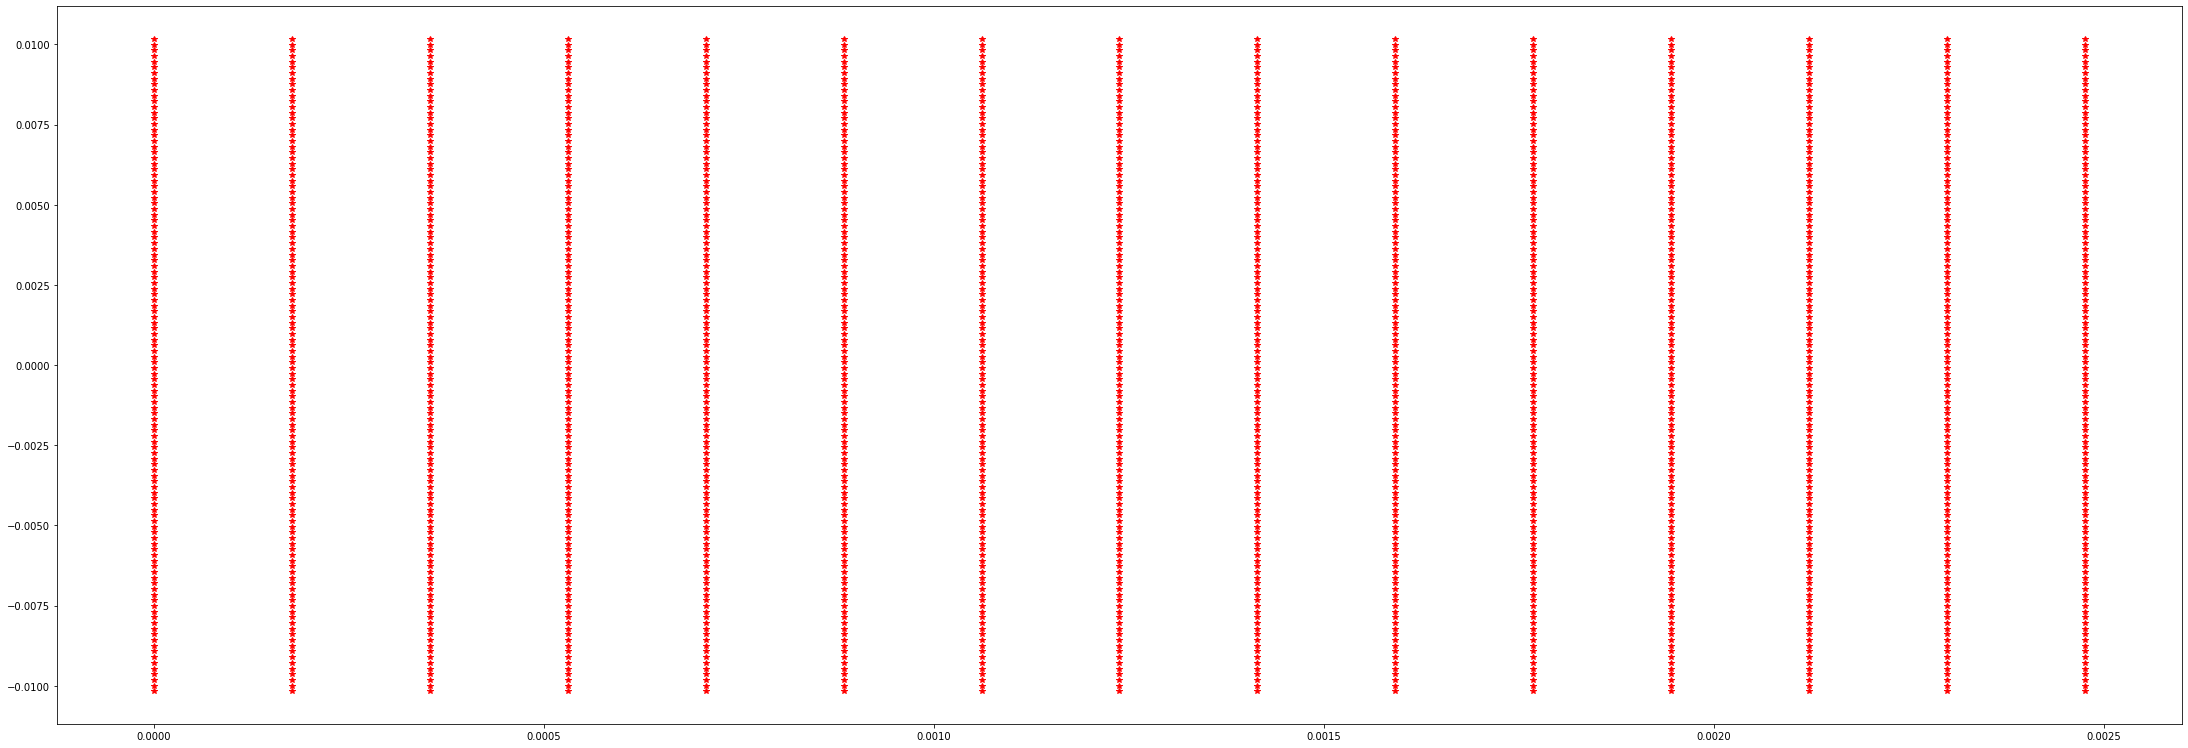

In [13]:
import matplotlib.pyplot as plt
# Vamos a graficar todos los puntos muestreados

plt.rcParams["figure.figsize"] = [30.50, 10.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(x,y,'r*')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


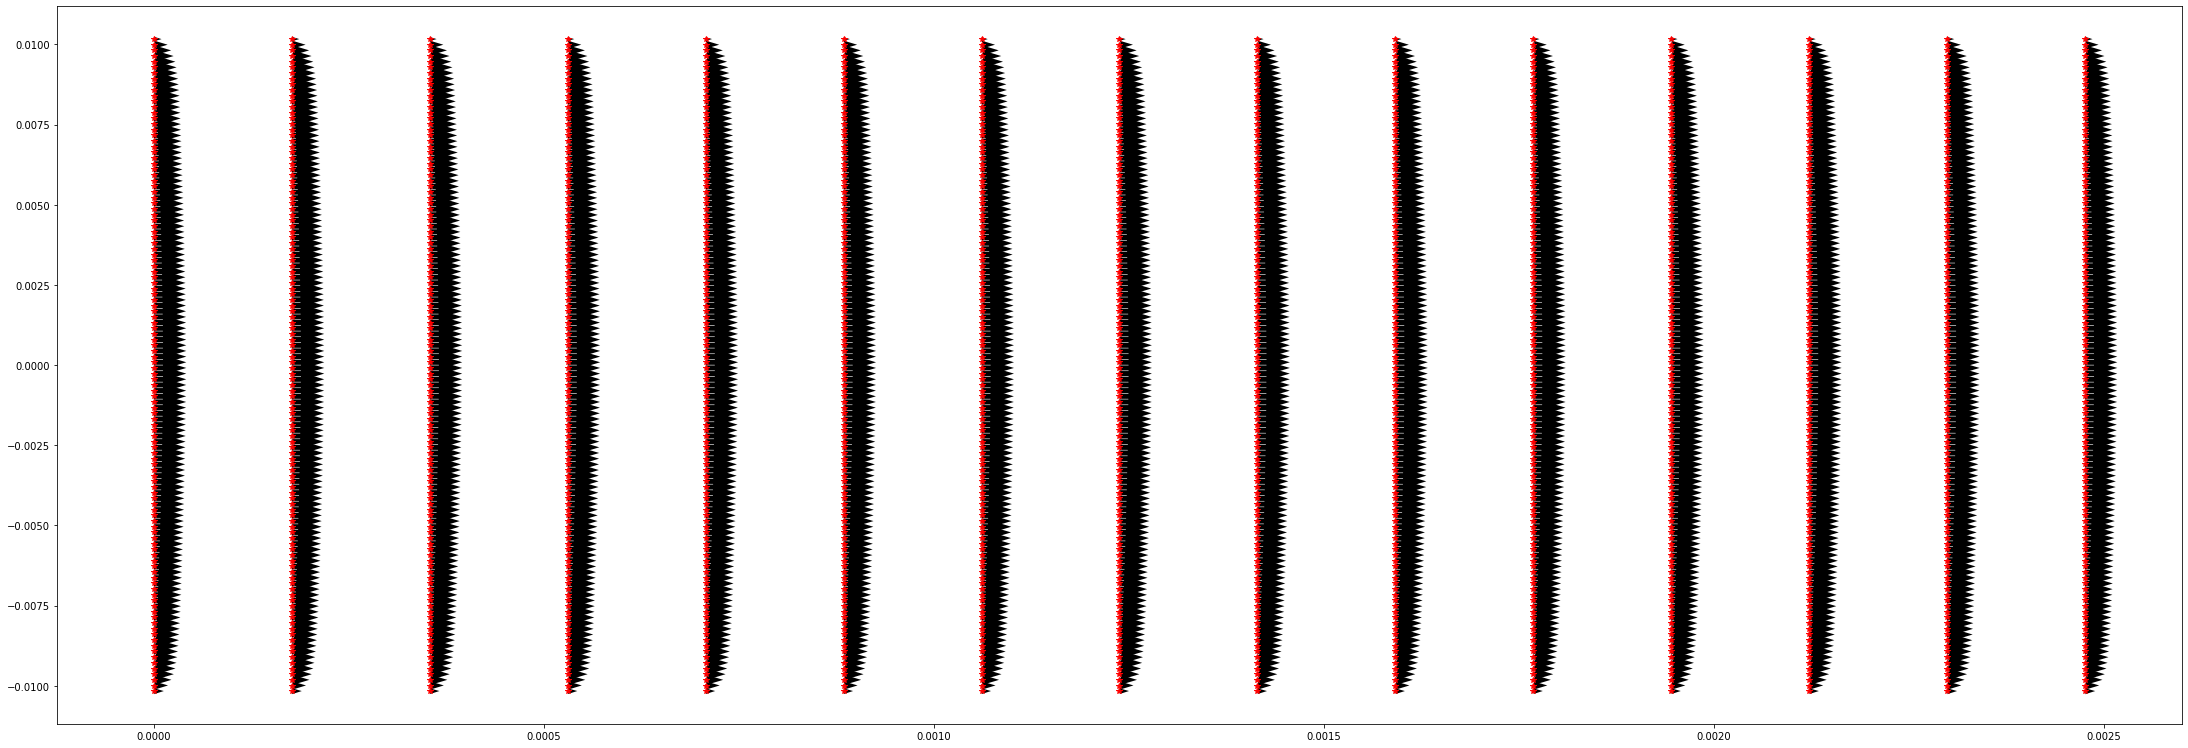

In [59]:
long_promedio = [] # Velocidades longitudinales promedio en cada punto
vert_promedio = [] # Velocidades transversales promedio en cada punto
for i in range(116):
    lista_1 = []
    lista_2 = []
    for j in range(15):
        lista_1.append(np.mean(np.array(u[i][j])))
        lista_2.append(np.mean(np.array(v[i][j])))

    long_promedio.append(lista_1)
    vert_promedio.append(lista_2)

plt.quiver(x, y, long_promedio, vert_promedio) # Velocidad media de cada punto en el espacio
plt.plot(x,y,'r*') # Puntos xy del espacio muestrado
plt.show()

1) Verificar presencia de vectores erróneos

2a) Calcular velocidades longitudinales y transversales medias 

In [62]:
# Velocidad longitudinal promedio
u_promedio = np.mean(u_array)
print(f"La velocidad longitudinal promedio es {u_promedio} m/s") # Debiese darnos 0.279 m/s
# Velocidad transversal promedio
v_promedio = np.mean(v_array)
print(f"La velocidad transversal promedio es {v_promedio} m/s") 

La velocidad longitudinal promedio es 0.28399841705259005 m/s
La velocidad transversal promedio es -0.00023552504234347524 m/s


$\bar{u} = 0.28399841705259005$ m/s
$\bar{v} = -0.00023552504234347524$ m/s

Ahora que se calculó la velocidad longitudinal media, se puede calcular el número de Reynolds del flujo usando como longitud característica el diámetro de la tubería ($Re = \frac{UD}{\nu}$)

In [70]:
reynolds_number = (u_promedio * agua["diametro"]) / agua["viscocidad cinemática"]
print(f"El número de reynolds del flujo es {reynolds_number}")

El número de reynolds del flujo es 5904.917582281576


$$Re = \frac{UD}{\nu} = 5904.917582281576$$

2.2) Calcular el campo de vorticidad medio (Revisar si esta forma de calcularla es correcta)

In [41]:
vorticidades = []
for i in range(116):
    for j in range(15):
        omega_z = np.gradient(v[i][j],x[i][j]) - np.gradient(u[i][j],y[i][j])
        if not np.inf in omega_z:
            vorticidades.append(omega_z)

vorticidad_media = np.mean(np.array(vorticidades))
print(f"La vorticidad media es {vorticidad_media}")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:1235: RuntimeWarning: divide by zero encountered in divide
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:1256: RuntimeWarning: divide by zero encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:1263: RuntimeWarning: divide by zero encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n


La vorticidad media es -9.452768351595751e-05


3) Tensiones de corte en la pared

4) Componentes del tensor de tensiones de Reynolds

In [72]:
u_prima = np.array([u - u_promedio])
v_prima = np.array([v - v_promedio])

reynolds_xy = np.mean((u_prima * v_prima)) * agua["densidad"]
reynolds_xx = np.mean((u_prima * u_prima)) * agua["densidad"]
reynolds_yy = np.mean((v_prima * v_prima)) * agua["densidad"]

print(f"Tensión xy: {reynolds_xy}")
print(f"Tensión xx: {reynolds_xx}")
print(f"Tensión yy: {reynolds_yy}")

tensor_reynolds = np.array([[reynolds_xx, reynolds_xy],
                            [reynolds_xy, reynolds_yy]])

print(f"El tensor de Reynolds es {tensor_reynolds}")

Tensión xy: -0.012789634381075433
Tensión xx: 2.87027998581794
Tensión yy: 0.15341185746769048
El tensor de Reynolds es [[ 2.87027999 -0.01278963]
 [-0.01278963  0.15341186]]


$$
\tau_{ij} = \begin{bmatrix}
    \tau_{xx} & \tau_{xy} \\
    \tau_{yx} & \tau_{yy}
   \end{bmatrix}
 =  \begin{bmatrix}
    2.87027998581794 & -0.012789634381075433 \\
    -0.012789634381075433 & 0.15341185746769048
   \end{bmatrix}
$$

Vamos a graficar la velocidad en un cierto punto y su descomposición de Reynolds